In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta

In [2]:
df=pd.read_csv("D:\Entertainment\Case Study\Aviation\Dataset1.csv")

In [3]:
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [4]:
df.count()

Date            5268
Time            3049
Location        5248
Operator        5250
Flight #        1069
Route           3562
Type            5241
Registration    4933
cn/In           4040
Aboard          5246
Fatalities      5256
Ground          5246
Summary         4878
dtype: int64

In [5]:
df.shape

(5268, 13)

In [6]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [7]:
df["Time"]=df["Time"].replace(np.nan,"00:00")

In [8]:
df.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [9]:
df["Time"].value_counts()

00:00    2223
15:00      32
12:00      31
11:00      29
19:30      26
         ... 
12:53       1
17:51       1
04:56       1
07:57       1
14:37       1
Name: Time, Length: 1005, dtype: int64

In [10]:
df["Time"]=df["Time"].str.replace("c: ","" )
df["Time"]=df["Time"].str.replace("c:","" )
df["Time"]=df["Time"].str.replace("c","" )
df["Time"]=df["Time"].str.replace("12'20","12:20" )
df["Time"]=df["Time"].str.replace("18.40","18:40" )
df["Time"]=df["Time"].str.replace("0943","09:43" )
df["Time"]=df["Time"].str.replace("22'08","22:08" )
df["Time"]=df["Time"].str.replace("114:20","00:00" )

In [11]:
df["Time"].value_counts()

00:00    2224
15:00      32
12:00      31
11:00      29
16:00      26
         ... 
19:49       1
13:16       1
21:32       1
19:43       1
14:37       1
Name: Time, Length: 994, dtype: int64

In [12]:
df["Time"]=df["Date"]+ " " +df["Time"]
def todate(x):
    return datetime.strptime(x, "%m/%d/%Y %H:%M")

df["Time"]=df["Time"].apply(todate)

In [13]:
df["Time"].min()

Timestamp('1908-09-17 17:18:00')

In [14]:
df["Time"].max()

Timestamp('2009-06-08 00:00:00')

In [15]:
print("Daterange: ", df["Time"].min(),"to",df["Time"].max())

Daterange:  1908-09-17 17:18:00 to 2009-06-08 00:00:00


In [16]:
df["Operator"]=df["Operator"].str.upper()

In [17]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


# Exploratory Data Analysis

In [18]:
temp=df.groupby(df["Time"].dt.year)[["Date"]].count()

In [19]:
temp.head()

,Date
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


In [20]:
temp=temp.rename(columns={"Date":"Count"})

In [21]:
temp.head()

,Count
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


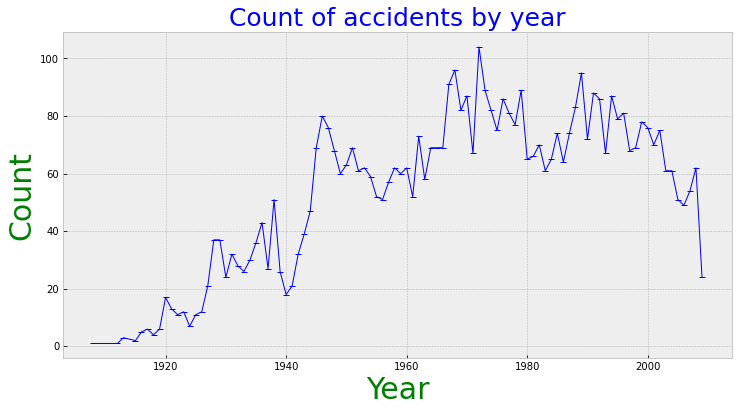

In [22]:
plt.figure(figsize=(12,6))
plt.style.use("bmh")
plt.plot(temp.index,"Count",data=temp,color="Blue",marker="_",linewidth=1)
plt.xlabel("Year",color="green",Fontsize=30)
plt.ylabel("Count",color="green",Fontsize=30)
plt.title("Count of accidents by year",color="Blue",Fontsize=25)
plt.show()

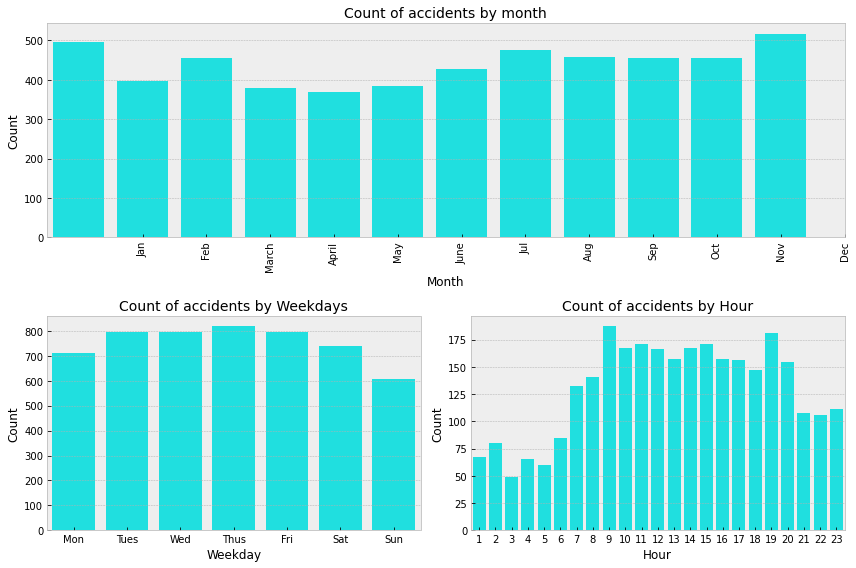

In [23]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2)
pl.figure(figsize=(12,8))
plt.style.use("seaborn-muted")
ax=pl.subplot(gs[0,:])
sns.barplot(df.groupby(df.Time.dt.month)[["Date"]].count().index,"Date",data=df.groupby(df.Time.dt.month)[["Date"]].count(),color="Cyan",linewidth=2)
plt.xticks(df.groupby(df.Time.dt.month)[["Date"]].count().index,["Jan","Feb","March","April","May","June","Jul","Aug","Sep","Oct","Nov","Dec"],rotation=90)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Count of accidents by month",fontsize=14)

ax=pl.subplot(gs[1,0])
sns.barplot(df.groupby(df.Time.dt.weekday)[["Date"]].count().index,"Date",data=df.groupby(df.Time.dt.weekday)[["Date"]].count(),color="Cyan",linewidth=2)
plt.xticks(df.groupby(df.Time.dt.weekday)[["Date"]].count().index,["Mon","Tues","Wed","Thus","Fri","Sat","Sun"])
plt.xlabel("Weekday",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Count of accidents by Weekdays",fontsize=14)


ax=pl.subplot(gs[1,1])
sns.barplot(df[df.Time.dt.hour!=0].groupby(df.Time.dt.hour)[["Date"]].count().index,"Date",data=df[df.Time.dt.hour!=0].groupby(df.Time.dt.hour)[["Date"]].count(),color="Cyan",linewidth=2)
plt.xlabel("Hour",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Count of accidents by Hour",fontsize=14)


plt.tight_layout()
plt.show()


# Passenger vs Military flights

In [24]:
temp1=df.copy()
temp1["is_Military"]=temp1["Operator"].str.contains("MILITARY")
temp1=temp1.groupby(["is_Military"])[["is_Military"]].count()
temp1.index=["Passenger","Military"]
temp1

,is_Military
Passenger,4469
Military,781


In [25]:
temp2=df.copy()
temp2["Military"]=temp2["Operator"].str.contains("MILITARY")
temp2["Passenger"]= temp2.Military==False
temp2=temp2.loc[:,["Time","Military","Passenger"]]
temp2

,Time,Military,Passenger
0,1908-09-17 17:18:00,True,False
1,1912-07-12 06:30:00,True,False
2,1913-08-06 00:00:00,False,True
3,1913-09-09 18:30:00,True,False
4,1913-10-17 10:30:00,True,False
...,...,...,...
5263,2009-05-20 06:30:00,True,False
5264,2009-05-26 00:00:00,False,True
5265,2009-06-01 00:15:00,False,True
5266,2009-06-07 08:30:00,False,True


In [26]:
temp2=temp2.groupby(temp2.Time.dt.year)[["Military","Passenger"]].aggregate(np.count_nonzero)

In [27]:
temp2

,Military,Passenger
Time,,
1908,1,0
1912,1,0
1913,2,1
1915,2,0
1916,5,0
...,...,...
2005,7,44
2006,12,37
2007,6,48


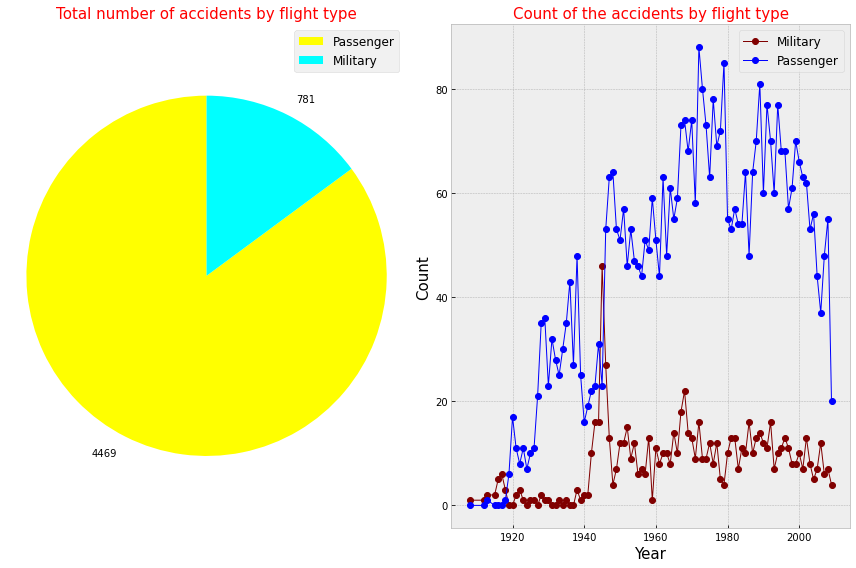

In [28]:
colors=["yellow","Cyan"]
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
patches,text=plt.pie(temp1.is_Military,colors=colors,labels=temp1.is_Military,startangle=90)
plt.legend(patches,temp1.index,fontsize=12)
plt.axis("equal")
plt.title("Total number of accidents by flight type",fontsize=15,color="Red")


plt.subplot(1,2,2)
plt.plot(temp2.index,"Military",data=temp2,color="Maroon",marker="o",linewidth=1)
plt.plot(temp2.index,"Passenger",data=temp2,color="Blue",marker="o",linewidth=1)
plt.legend(fontsize=12)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Count of the accidents by flight type",fontsize=15,color="Red")
plt.tight_layout()
plt.show()


# Total number of Fatalities

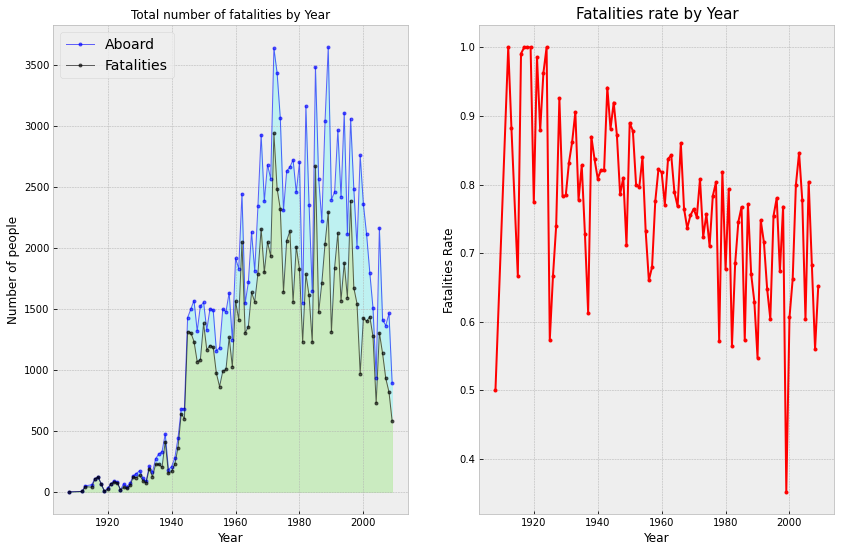

In [29]:
fatalities=df.groupby(df.Time.dt.year).sum()
fatalities["Proportion"]=fatalities["Fatalities"]/fatalities["Aboard"]

plt.figure(figsize=(14,9))
plt.subplot(1,2,1)
plt.fill_between(fatalities.index,"Aboard",data=fatalities,color="Cyan",alpha=0.2)
plt.plot(fatalities.index,"Aboard",data=fatalities,marker=".",color="blue",alpha=0.6,linewidth=1)


plt.fill_between(fatalities.index,"Fatalities",data=fatalities,color="gold",alpha=0.2)
plt.plot(fatalities.index,"Fatalities",data=fatalities,marker=".",color="black",alpha=0.6,linewidth=1)


plt.legend(fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of people",fontsize=12)
plt.title("Total number of fatalities by Year",fontsize=12)


plt.subplot(1,2,2)
plt.plot(fatalities.index,"Proportion",data=fatalities,color="red",linewidth=2,marker=".")
plt.xlabel("Year",fontsize=12)
plt.ylabel("Fatalities Rate",fontsize=12)
plt.title("Fatalities rate by Year",fontsize=15)
plt.show()


# working on dataset2

In [30]:
df2=pd.read_csv("D:\Entertainment\Case Study\Aviation\Dataset2.csv")

In [31]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.0,274280.00,NaN,NaN
1,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1647425.0,1722612.61,NaN,NaN
2,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.0,1482546.0,1375523.0,1516628.00,NaN,NaN
3,Albania,ALB,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,8.297789e+05,8.143397e+05,865848.0,151632.0,NaN,26634.0,204090.0,303137.00,NaN,NaN
4,Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df2.shape

(264, 65)

In [33]:
df2=df2.drop(["Country Name","Country Code","Indicator Name","Indicator Code"],axis=1)

In [34]:
df2=df2.replace(np.nan,0)

In [35]:
df2=pd.DataFrame(df2.sum())

In [36]:
df2.tail()

,0
2016,3.104586e+10
2017,3.350035e+10
2018,3.588238e+10
2019,0.000000e+00
Unnamed: 64,0.000000e+00


In [37]:
df2=df2.drop(df2.index[0:10])
df2=df2["1970":"2008"]
df2.columns=["Sum"]
df2.index.name="Year"

In [38]:
df2.shape

(39, 1)

In [39]:
df2.head()

,Sum
Year,
1970,1.850484e+09
1971,1.979946e+09
1972,1.817426e+09
1973,2.388611e+09
1974,2.867234e+09


In [40]:
fatalities=fatalities.reset_index()

In [41]:
fatalities

,Time,Aboard,Fatalities,Ground,Proportion
0,1908,2.0,1.0,0.0,0.500000
1,1912,5.0,5.0,0.0,1.000000
2,1913,51.0,45.0,0.0,0.882353
3,1915,60.0,40.0,0.0,0.666667
4,1916,109.0,108.0,0.0,0.990826
...,...,...,...,...,...
93,2005,2164.0,1306.0,59.0,0.603512
94,2006,1413.0,1136.0,4.0,0.803963
95,2007,1364.0,931.0,57.0,0.682551
96,2008,1463.0,820.0,60.0,0.560492


In [42]:
fatalities.Time=fatalities.Time.apply(str)
fatalities.index=fatalities["Time"]
del fatalities["Time"]
fatalities=fatalities["1970":"2008"]
fatalities=fatalities[["Fatalities"]]
total=pd.concat([df2,fatalities],axis=1)
total["Ratio"]=total["Fatalities"]*100/total["Sum"]

In [43]:
total.head()

,Sum,Fatalities,Ratio
1970,1.850484e+09,2049.0,0.000111
1971,1.979946e+09,1932.0,0.000098
1972,1.817426e+09,2937.0,0.000162
1973,2.388611e+09,2485.0,0.000104
1974,2.867234e+09,2318.0,0.000081


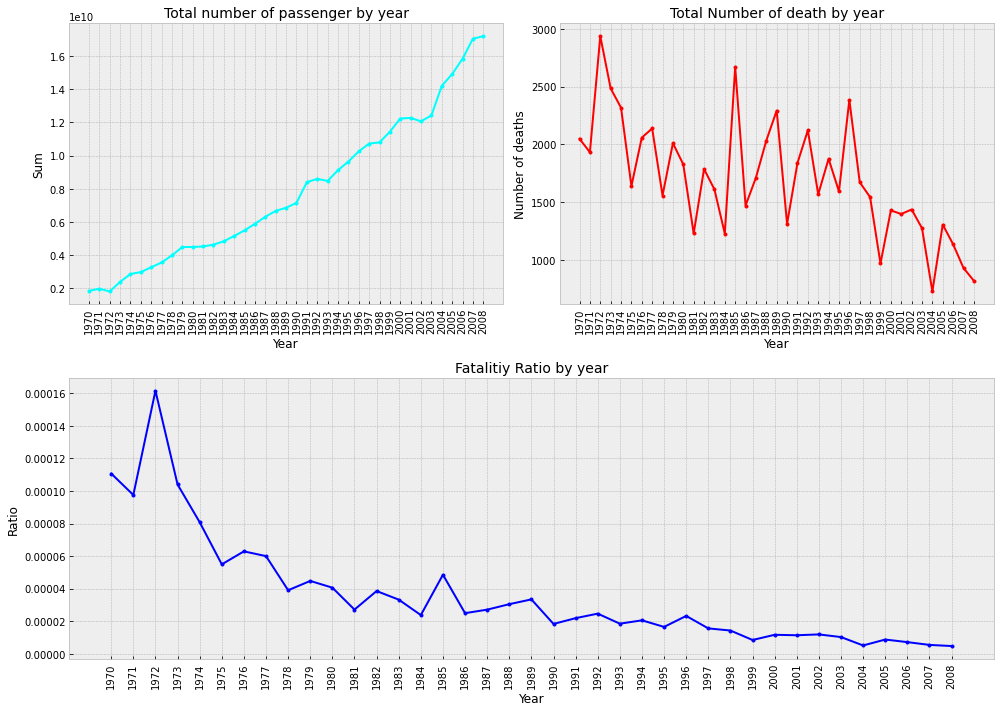

In [44]:
gs=gridspec.GridSpec(2,2)
pl.figure(figsize=(14,10))

ax=pl.subplot(gs[0,0])
plt.plot(total.index,"Sum",data=total,marker=".",color="Cyan",linewidth=2)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Sum",fontsize=12)
plt.title("Total number of passenger by year",fontsize=14)
plt.xticks(rotation=90)


ax=pl.subplot(gs[0,1])
plt.plot(total.index,"Fatalities",data=total,marker=".",color="Red",linewidth=2)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of deaths",fontsize=12)
plt.title("Total Number of death by year",fontsize=14)
plt.xticks(rotation=90)


ax=pl.subplot(gs[1,:])
plt.plot(total.index,"Ratio",data=total,marker=".",color="Blue",linewidth=2)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Ratio",fontsize=12)
plt.title("Fatalitiy Ratio by year",fontsize=14)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

# Plot for Ratio & number of deaths 

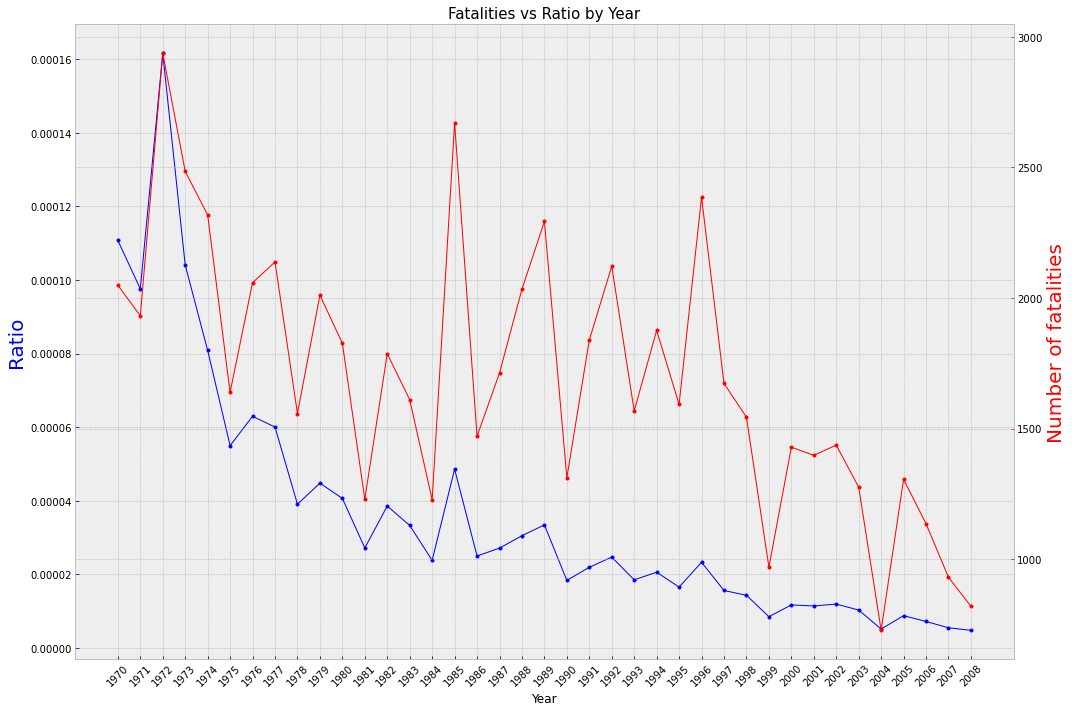

In [45]:
fig=plt.figure(figsize=(15,10))
ax1=fig.subplots()
ax1.plot(total.index,"Ratio",data=total,color="blue",marker=".",linewidth=1)
ax1.set_xlabel("Year",fontsize=12)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
ax1.set_ylabel("Ratio",color="blue",fontsize=20)
ax1.tick_params("y",color="blue")

ax2=ax1.twinx()

ax2.plot(fatalities.index,"Fatalities",color="Red",data=fatalities,marker=".",linewidth=1)
ax2.set_ylabel("Number of fatalities",color="Red",fontsize=20)
ax2.tick_params("y",color="Red")
plt.title("Fatalities vs Ratio by Year",fontsize=15)
plt.tight_layout()
plt.show()

# Operator analysis

In [46]:
df.Operator=df.Operator.str.upper()
df.Operator=df.Operator.replace("A B AREOTRANSPORT","AB AREOTRANSPORT")

total_op=df.groupby("Operator")[["Operator"]].count()
total_op=total_op.rename(columns={"Operator":"Count"})
total_op=total_op.sort_values(by="Count",ascending=False).head(30)

In [47]:
total_op

,Count
Operator,
AEROFLOT,179
MILITARY - U.S. AIR FORCE,176
AIR FRANCE,70
DEUTSCHE LUFTHANSA,65
AIR TAXI,48
CHINA NATIONAL AVIATION CORPORATION,44
UNITED AIR LINES,44
MILITARY - U.S. ARMY AIR FORCES,43
PAN AMERICAN WORLD AIRWAYS,41


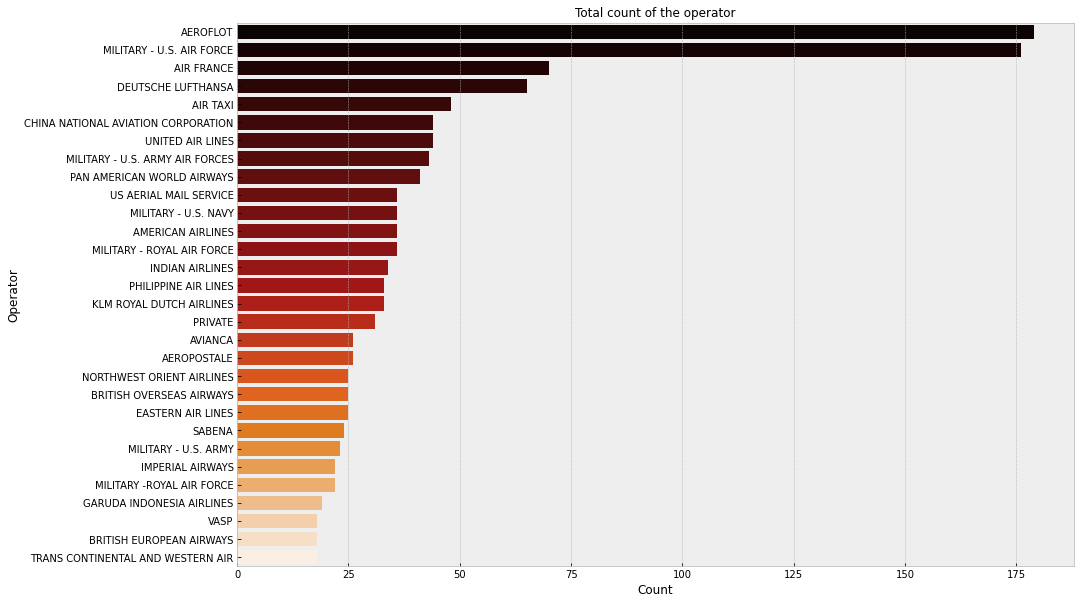

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(y=total_op.index,x="Count",data=total_op,palette="gist_heat",orient="h")
plt.xlabel("Count",fontsize=12)
plt.ylabel("Operator",fontsize=12)
plt.title("Total count of the operator",fontsize=12)
plt.show()

In [49]:
prop_by_op=df.groupby("Operator")[["Fatalities"]].sum()
prop_by_op=prop_by_op.rename(columns={"Opeator":"Fatalities"})
prop_by_op=prop_by_op.sort_values(by="Fatalities",ascending=False).head(30)
prop_by_op

,Fatalities
Operator,
AEROFLOT,7156.0
MILITARY - U.S. AIR FORCE,3717.0
AIR FRANCE,1734.0
AMERICAN AIRLINES,1421.0
PAN AMERICAN WORLD AIRWAYS,1302.0
MILITARY - U.S. ARMY AIR FORCES,1070.0
UNITED AIR LINES,1021.0
AVIANCA,945.0
TURKISH AIRLINES (THY),891.0


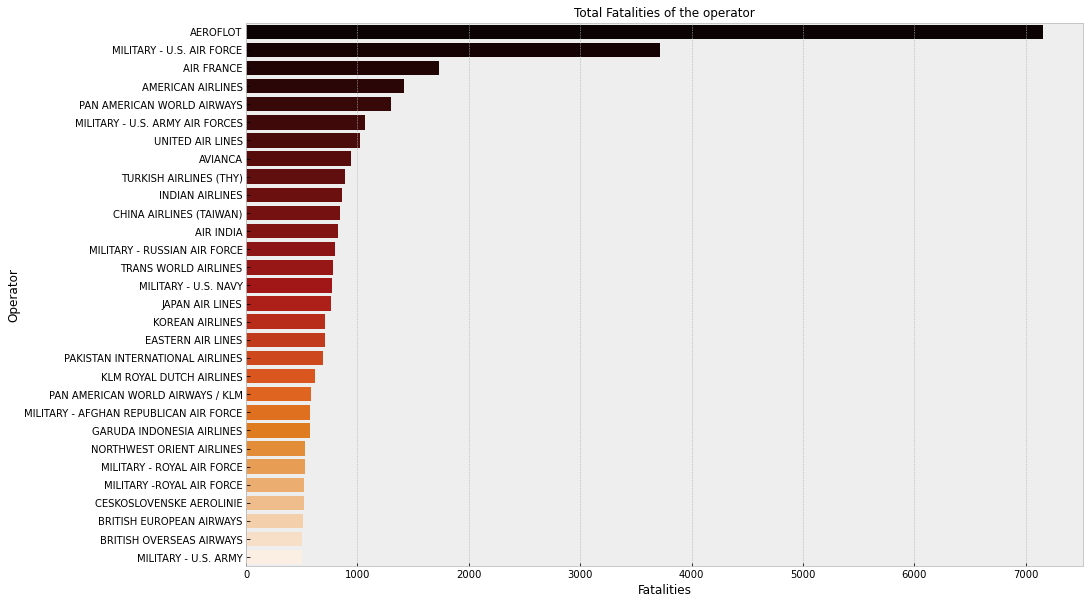

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(y=prop_by_op.index,x="Fatalities",data=prop_by_op,palette="gist_heat",orient="h")
plt.xlabel("Fatalities",fontsize=12)
plt.ylabel("Operator",fontsize=12)
plt.title("Total Fatalities of the operator",fontsize=12)
plt.show()

In [51]:
df=df.set_index("Operator")

In [52]:
safest_flights=df[df["Fatalities"]==df["Fatalities"].min()].index.to_list()

In [53]:
safest_flights

['IMPERIAL AIRWAYS',
 'CHINA NATIONAL AVIATION CORPORATION',
 'AMERICAN AIRLINES',
 'AMERICAN AIRLINES',
 'KLM ROYAL DUTCH AIRLINES',
 'UNITED AIR LINES',
 'CONTINENTAL AIRLINES',
 'PAN AMERICAN WORLD AIRWAYS',
 'MILITARY - U.S. AIR FORCE',
 'EASTERN AIR LINES',
 'AEROFLOT',
 'WESTERN AIRLINES',
 'EASTERN AIR LINES',
 'PAN AMERICAN WORLD AIRWAYS',
 'CONTINENTAL AIRLINES',
 'MILITARY - U.S. MARINE CORPS',
 'ISLAND SKY FERRY - AIR TAXI',
 'JAPAN AIR LINES',
 'MILITARY U.S. NAVY',
 'PAN AMERICAN WORLD AIRWAYS',
 'PRIVATE',
 'CONTINENTAL AIRLINES',
 'AMERICAN AIRLINES',
 'MILITARY - TURKISH AIR FORCE',
 'BRITISH AIRWAYS',
 'WESTERN HELICOPTER',
 'EASTERN AIR LINES',
 'AIR CANADA',
 'SCANDINAVIAN AIRLINES (SAS)',
 'CHINA AIRLINES (TAIWAN)',
 'AMERICAN AIRLINES',
 'MILITARY - FRENCH AIR FORCE',
 'TACA',
 'MILITARY - INDIAN AIR FORCE',
 'BRITISH AIRWAYS',
 'SCANDINAVIAN AIRLINES (SAS)',
 'TRANS WORLD AIRLINES',
 'JAPAN AIR LINES',
 'AMERICAN INTERNATIONAL AIRWAYS',
 'CONTINENTAL AIRLINES',
 '

In [61]:
df=df.reset_index()

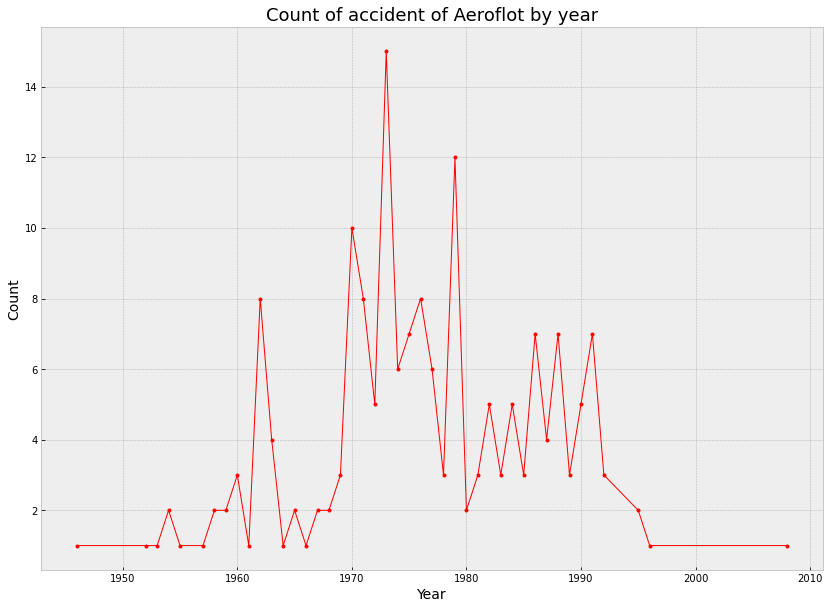

In [68]:
Aeroflot=df[df["Operator"]=="AEROFLOT"]
Count_by_year=Aeroflot.groupby(df.Time.dt.year)[["Date"]].count()
Count_by_year=Count_by_year.rename(columns={"Date":"Count"})

plt.figure(figsize=(14,10))
plt.plot(Count_by_year.index,"Count",data=Count_by_year,marker=".",color="red",linewidth=1)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title("Count of accident of Aeroflot by year",fontsize=18)
plt.show()